In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
#load data/AllWeathDTypes_NWPP_10yrs.csv as a dataframe
dfX = pd.read_csv("data/AllWeathDTypes_NWPP_10yrs.csv")
dfY = pd.read_csv("data/RTLoad_MIDC+NW_10yrs.csv")
#subtract 7 hours from datetime to convert from UTC to PST
dfY['datetime'] = pd.to_datetime(dfY['datetime'])
dfY['datetime'] = dfY['datetime'] - pd.Timedelta(hours=7)
dfX['datetime'] = pd.to_datetime(dfX['datetime'])
dfX['datetime'] = (dfX['datetime'] - pd.Timedelta(hours=7))

In [4]:
from helpers import totalload

# Use the totalload function to calculate the total load
start_date = '2022-03-01'
end_date = '2025-06-01'
dfY = totalload(dfY, start_date, end_date)

In [5]:
df_XY = pd.merge(dfX, dfY, on='datetime')
df_XY.head()

,datetime,cloudCover,dewpoint,electric_cdd,electric_hdd,gas_cdd,gas_hdd,heatIndex,population_cdd,population_hdd,...,temperature,temperature_avg,temperature_max,temperature_min,weighted_cdd,weighted_hdd,windChill,windDirection,windSpeed,Total Load
0,2022-03-02 00:00:00,77.0,42.0,NaN,NaN,NaN,NaN,49.0,NaN,NaN,...,49.0,NaN,NaN,NaN,NaN,NaN,46.0,129.0,6.0,15502.000000
1,2022-03-02 01:00:00,76.0,42.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,44.0,127.0,6.0,14518.250000
2,2022-03-02 02:00:00,81.0,42.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,44.0,121.0,5.0,13943.250000
3,2022-03-02 03:00:00,86.0,43.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,44.0,104.0,6.0,13651.666667
4,2022-03-02 04:00:00,85.0,42.0,NaN,NaN,NaN,NaN,46.0,NaN,NaN,...,46.0,NaN,NaN,NaN,NaN,NaN,45.0,144.0,3.0,13507.416667


In [ ]:
# Extract date and time components from the 'datetime' column
df_XY['year'] = df_XY['datetime'].dt.year
df_XY['month'] = df_XY['datetime'].dt.month
df_XY['date'] = df_XY['datetime'].dt.day
df_XY['day'] = df_XY['datetime'].dt.dayofweek
df_XY['time'] = df_XY['datetime'].dt.hour

In [11]:
#groupby date and get mean of each day
df_daily = df_XY.groupby(df_XY['datetime'].dt.date).mean()

In [13]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 2022-03-02 to 2025-05-31
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          1187 non-null   datetime64[ns]
 1   cloudCover        1187 non-null   float64       
 2   dewpoint          1187 non-null   float64       
 3   electric_cdd      1187 non-null   float64       
 4   electric_hdd      1187 non-null   float64       
 5   gas_cdd           1187 non-null   float64       
 6   gas_hdd           1187 non-null   float64       
 7   heatIndex         1187 non-null   float64       
 8   population_cdd    1187 non-null   float64       
 9   population_hdd    1187 non-null   float64       
 10  relativeHumidity  1187 non-null   float64       
 11  temperature       1187 non-null   float64       
 12  temperature_avg   1187 non-null   float64       
 13  temperature_max   1187 non-null   float64       
 14  temperature_mi

In [16]:
dfX.head()

,datetime,cloudCover,dewpoint,electric_cdd,electric_hdd,gas_cdd,gas_hdd,heatIndex,population_cdd,population_hdd,relativeHumidity,temperature,temperature_avg,temperature_max,temperature_min,weighted_cdd,weighted_hdd,windChill,windDirection,windSpeed
0,2015-12-31 17:00:00,10.0,18.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,57.0,32.0,27.5,35.0,20.0,0.0,37.6,24.0,81.0,10.0
1,2015-12-31 18:00:00,12.0,18.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,63.0,30.0,NaN,NaN,NaN,NaN,NaN,23.0,78.0,7.0
2,2015-12-31 19:00:00,4.0,18.0,NaN,NaN,NaN,NaN,29.0,NaN,NaN,66.0,29.0,NaN,NaN,NaN,NaN,NaN,20.0,96.0,10.0
3,2015-12-31 20:00:00,5.0,17.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,65.0,28.0,NaN,NaN,NaN,NaN,NaN,19.0,97.0,9.0
4,2015-12-31 21:00:00,6.0,17.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,66.0,27.0,NaN,NaN,NaN,NaN,NaN,19.0,97.0,8.0


Polynomial Regression Coefficients:
day: -239.6582
month: -401.7634
temperature: -1286.2194
relativeHumidity: -3.2992
cloudCover: -239.8809
temperature_spread: 114.6795
day^2: -623.9639
day month: -11.8452
day temperature: 53.1185
day relativeHumidity: -388.5758
day cloudCover: 174.9561
day temperature_spread: -66.3051
month^2: 248.1547
month temperature: -102.9322
month relativeHumidity: -216.8484
month cloudCover: -68.0029
month temperature_spread: 115.7298
temperature^2: 1442.0064
temperature relativeHumidity: 266.9725
temperature cloudCover: -577.6810
temperature temperature_spread: -348.6379
relativeHumidity^2: 207.5814
relativeHumidity cloudCover: -917.5110
relativeHumidity temperature_spread: -578.3367
cloudCover^2: 263.9176
cloudCover temperature_spread: -15.7446
temperature_spread^2: -194.2314
day^3: -766.9921
day^2 month: 92.7159
day^2 temperature: -106.1666
day^2 relativeHumidity: 150.6101
day^2 cloudCover: -73.6165
day^2 temperature_spread: 144.2575
day month^2: 185.4961
da

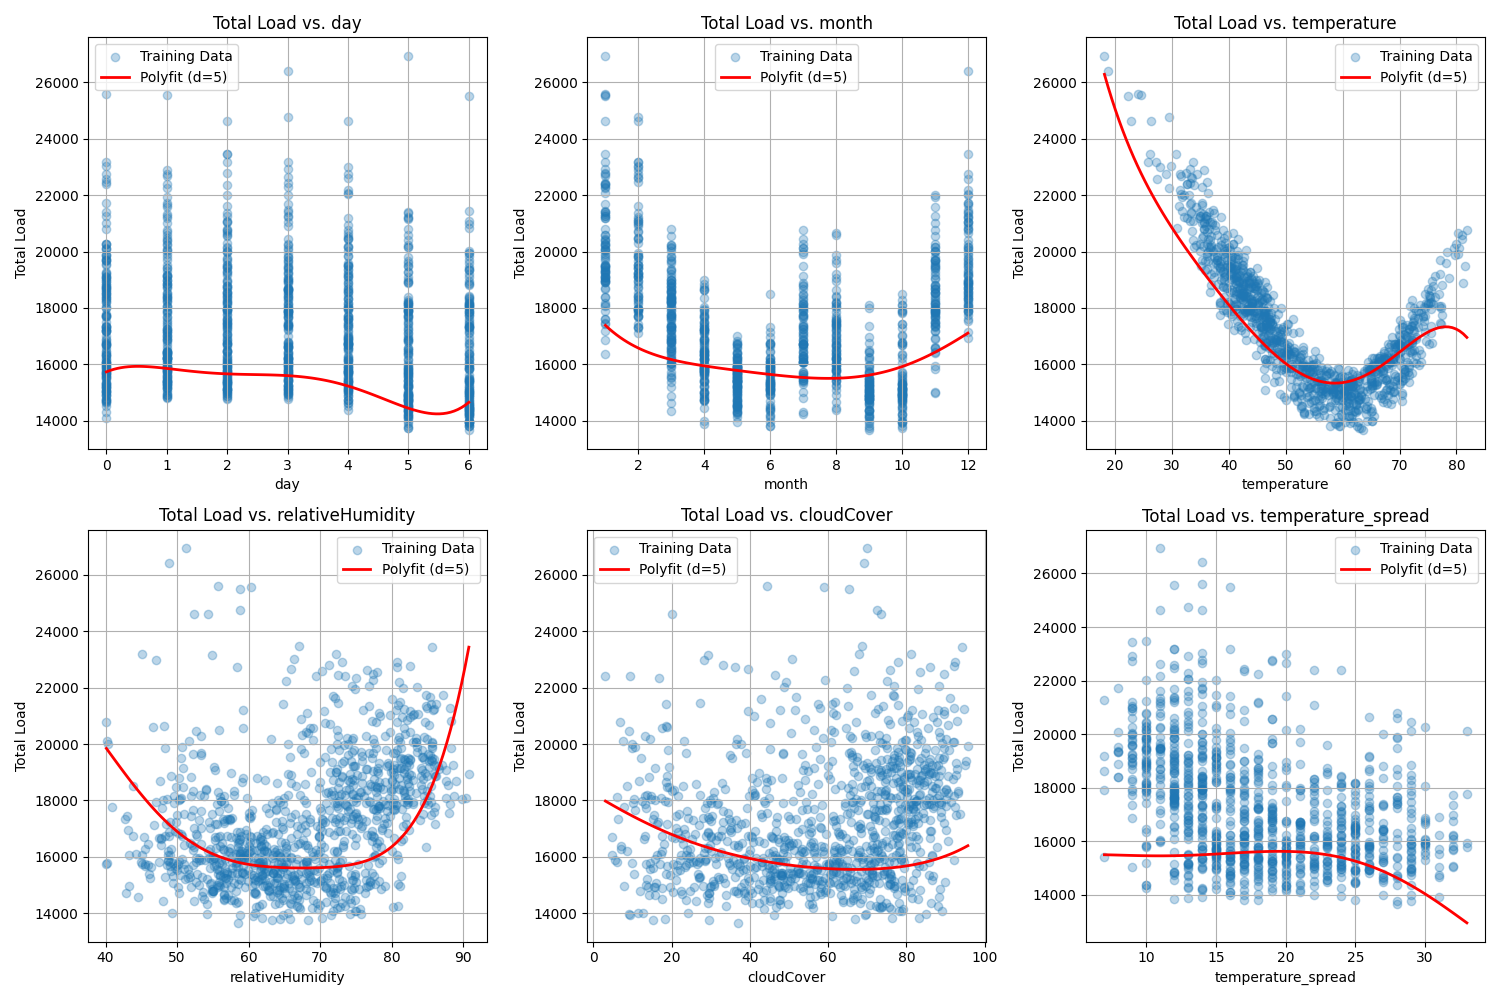

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 1. Feature Engineering and Selection
df_daily['temperature_spread'] = df_daily['temperature_max'] - df_daily['temperature_min']
features = ['day', 'month', 'temperature', 'relativeHumidity', 'cloudCover', 'temperature_spread']
target = 'Total Load'

X = df_daily[features]
y = df_daily[target]

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Polynomial Regression
poly_degree = 5
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 5. Print coefficients and evaluate the model
print("Polynomial Regression Coefficients:")
# Create a mapping from feature names to coefficients for better readability
feature_names = poly.get_feature_names_out(features)
for i, coef in enumerate(model.coef_):
    print(f"{feature_names[i]}: {coef:.4f}")
print(f"\nIntercept: {model.intercept_:.4f}")


train_r2 = model.score(X_train_poly, y_train)
test_r2 = model.score(X_test_poly, y_test)

print(f"\nR-squared on training data: {train_r2:.4f}")
print(f"R-squared on test data: {test_r2:.4f}")

# 6. Visualization
# Create a figure with subplots for each feature
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# To plot the effect of each feature, we hold other features at their mean
X_train_scaled_mean = X_train_scaled.mean(axis=0)

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Generate a range of values for the current feature
    feature_col_index = X_train.columns.get_loc(feature)
    feature_range_scaled = np.linspace(X_train_scaled[:, feature_col_index].min(), X_train_scaled[:, feature_col_index].max(), 100)
    
    # Create a test set where only the current feature varies
    plot_X_scaled = np.tile(X_train_scaled_mean, (100, 1))
    plot_X_scaled[:, feature_col_index] = feature_range_scaled
    
    # Transform for polynomial prediction
    plot_X_poly = poly.transform(plot_X_scaled)
    
    # Predict
    y_pred_plot = model.predict(plot_X_poly)
    
    # Inverse transform the feature values to their original scale for plotting
    feature_range_original = scaler.inverse_transform(plot_X_scaled)[:, feature_col_index]
    
    # Sort values for a smooth line plot
    sort_indices = np.argsort(feature_range_original)
    
    # Scatter plot of original data
    ax.scatter(X_train[feature], y_train, alpha=0.3, label='Training Data')
    
    # Plot the polynomial curve
    ax.plot(feature_range_original[sort_indices], y_pred_plot[sort_indices], color='red', linewidth=2, label=f'Polyfit (d={poly_degree})')
    
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f'{target} vs. {feature}')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()